<a href="https://colab.research.google.com/github/Carol-Coutinho/OU3/blob/main/Calculo_PB_PO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Preparando kernel
import pandas as pd
!pip3 install pickle5
import pickle5 as pickl
import numpy as np

     |████████████████████████████████| 132 kB 5.2 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219315 sha256=7478f4b4dd359e78f9ce9c88b2d86bc48e7d1ccbfd00f39d5506a49450d41a0f
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [ ]:
# Para ler/carregar
with open('/content/databank_properties.pickle', 'rb') as handle:
    dados, all_units = pickl.load(handle)

In [ ]:
lista_componentes = [242, 286]
nc = len(lista_componentes)
nc

2

In [ ]:
# Verificando os pontos de ebulição de nossos componentes a fim de escolher o valor intermediário para nossa T_flash
T_eb_comp = dados[dados['num'].isin(lista_componentes)]['boiling_point']
T_eb_comp = T_eb_comp.tolist()
T_eb_comp

[353.3, 383.8]

In [ ]:
def f_Pvap_Antoine_db(Temp, i_comp, dados):
  # param <- as.numeric(param)
  par_array = np.array(dados[dados['num'] == i_comp][['pvap_a','pvap_b','pvap_c']])[0]
  par = {'a': par_array[0], 'b': par_array[1], 'c': par_array[2]}
  a = par['a']
  b = par['b']
  c = par['c']
  Pvap = np.exp(a - b/(Temp + c))
  # attr(x = Pvap, which = "units") <- "mmHg"
  return Pvap, par

In [ ]:
T_flash = 386.15   # K
P_flash = 760.0 # mmHg
T_flash, P_flash

(386.15, 760.0)

In [ ]:
T_vetor = np.linspace(370,390,10)
i_comp = lista_componentes[0]
f_Pvap_Antoine_db(T_vetor, i_comp, dados)[0]

array([1238.87912967, 1316.79065405, 1398.42451546, 1483.8955438 ,
       1573.31958816, 1666.81345545, 1764.4948486 , 1866.48230464,
       1972.89513256, 2083.85335124])

In [ ]:
# Verificação do cálculo da P_vap e da volatilidade K
P_vap_comp = np.empty(nc)
K_comp = np.empty(nc)
k = 0
for i_comp in lista_componentes:
  P_vap_comp[k], par = f_Pvap_Antoine_db(T_flash, i_comp, dados)
  K_comp[k] = P_vap_comp[k] / P_flash
  k += 1
P_vap_comp, K_comp

(array([1894.50921839,  812.64770633]), array([2.49277529, 1.0692733 ]))

In [ ]:
z = np.array([0.5, 0.5])
z

array([0.5, 0.5])

In [ ]:
def f_Pb_T(Temp,P,z,lista_componentes,dados):
  if (type(Temp) == float):
    Temp = np.array([Temp])
  nc = len(z)
  nr = len(Temp)
  MP = np.empty((nr,nc))
  x = z
  k = 0
  for i_comp in lista_componentes:
    P_vap_comp = f_Pvap_Antoine_db(Temp, i_comp, dados)[0]
    K_comp = P_vap_comp / P_flash
    MP[:,k] = K_comp * x[k]
    k += 1
  f = 1 - np.sum(MP, axis=1)
  return f

In [ ]:
f_Pb_T(T_flash, P_flash, z, lista_componentes, dados)

array([-0.78102429])

In [ ]:
f_Pb_T(T_vetor, P_flash, z, lista_componentes, dados)

array([-0.14737204, -0.22211566, -0.30060774, -0.38297379, -0.46934087,
       -0.55983755, -0.65459381, -0.75374104, -0.85741192, -0.96574039])

In [ ]:
import matplotlib.pyplot as plt

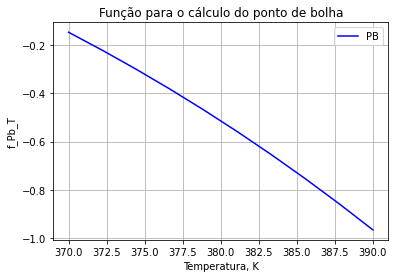

In [ ]:
# Fazendo o gráfico da f_Pb_T
fig1, ax1 = plt.subplots()
ax1.plot(T_vetor,
         f_Pb_T(T_vetor, P_flash, z, lista_componentes, dados),
         'b', label='PB')
#ax1.plot(C_A_eq_teste[:,0], q_A_prev, 'r-', label='mod')
# Adicionando texto nos eixos - descrição
ax1.set_xlabel('Temperatura, K')
ax1.set_ylabel('f_Pb_T')
# Adicionando título para a figura
ax1.set_title('Função para o cálculo do ponto de bolha')
# Adicionando uma legenda
ax1.legend()
ax1.grid()

In [ ]:
from scipy.optimize import fsolve

In [ ]:
sum(T_eb_comp)/2

368.55

In [ ]:
T_Pb = fsolve(f_Pb_T, sum(T_eb_comp)/2, args=(P_flash, z, lista_componentes, dados))[0]
T_Pb

365.2633698278335

In [ ]:
def f_Po_T(Temp,P,z,lista_componentes,dados):
  if (type(Temp) == float):
    Temp = np.array([Temp])
  nc = len(z)
  nr = len(Temp)
  MP = np.empty((nr,nc))
  y = z
  k = 0
  for i_comp in lista_componentes:
    P_vap_comp = f_Pvap_Antoine_db(Temp, i_comp, dados)[0]
    K_comp = P_vap_comp / P_flash
    MP[:,k] = y[k] / K_comp
    k += 1
  f = 1 - np.sum(MP, axis=1)
  return f

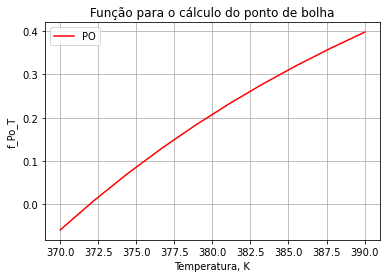

In [ ]:
# Fazendo o gráfico da f_Po_T
fig1, ax1 = plt.subplots()
ax1.plot(T_vetor,
         f_Po_T(T_vetor, P_flash, z, lista_componentes, dados),
         'r', label='PO')
#ax1.plot(C_A_eq_teste[:,0], q_A_prev, 'r-', label='mod')
# Adicionando texto nos eixos - descrição
ax1.set_xlabel('Temperatura, K')
ax1.set_ylabel('f_Po_T')
# Adicionando título para a figura
ax1.set_title('Função para o cálculo do ponto de bolha')
# Adicionando uma legenda
ax1.legend()
ax1.grid()

In [ ]:
T_Po = fsolve(f_Po_T, sum(T_eb_comp)/2, args=(P_flash, z, lista_componentes, dados))[0]
T_Po

371.92390420927444